# Simple/Multiple Linear Regression Implementation 

## Project overview


This project is about modelling the linear relationshp between Height and Weight of Men and Women.

###  Linear Regression


Linear regression is an approach to model the relationship between a single dependent variable (target variable) and one (simple regression) or more (multiple regression) independent variables. The linear regression model assumes a linear relationship between the input and output variables. If this relationship is present, we can estimate the coefficients required by the model to make predictions on new data.
This technique is applicable for Supervised learning Regression problems where we try to predict a continuous variable.


Linear Regression can be further classified into two types – Simple and Multiple Linear Regression. In this project, We will employ Simple LR and multiple LR technique.


###  Simple Linear Regression (SLR)

Simple Linear Regression (or SLR) is the simplest model in machine learning. It models the linear relationship between the independent and dependent variables. 

In this project, there is one independent or input variable which represents the Height data and is denoted by X. Similarly, there is one dependent or output variable which represents the Weight data and is denoted by y. We want to build a linear relationship between these variables. This linear relationship can be modelled by mathematical equation of the form:-
				 
                 
                 Y = β0   + β1*X    -------------   (1)
                 

In this equation, X and Y are called independent and dependent variables respectively,

β1 is the coefficient for independent variable and

β0 is the constant term.

β0 and β1 are called parameters of the model.
 

We can see that 

slope of the line is given by β1,  and

intercept of the line by β0. 


###  Multiple Linear Regression (MLR)

Multiple linear regression uses a linear function to predict the value of a target variable y, containing the function n independent variable x=[x₁,x₂,x₃,…,xₙ]. 

                     Y = β0   + β1*X1+ β2*X2+ ...βn*Xn   -------------   (2)


## Ordinary Least Square Method


Now, our task is to find a line which best fits this data. This line will help us to predict the value of any Target variable for any given Feature variable. This line is called **Regression line**. 


We can define an error function for any line. Then, the regression line is the one which minimizes the error function. Such an error function is also called a **Cost function**. 


## Cost Function

The obective of method is to get the regression to be as close to actual data points as possible. It can be achieved by minimizing the vertical distance between the actual data point and fitted line. The vertical distance between each data point and the line is called the **residual**. 


So, in oher words, we try to minimize the residuals by finding the **line of best fit**.

 
We can try to minimize the sum of square of the residuals to avoid to cancel the positive residual and negative residuals.

Mathematically, we denote actual data points by yi and predicted data points by ŷi. So, the residual for a data point i would be given as 
				
                di = yi -  ŷi

Sum of the squares of the residuals is given as:

				D = Ʃ di**2       for all data points
                

This is the **Cost function**. It denotes the total error present in the model which is the sum of the total errors of each individual data point. 

We can estimate the parameters of the model β0 and β1 by minimize the error in the model by minimizing cost function.


This method of finding the parameters of the model and thus regression line is called **Ordinary Least Square Method**.


## Performance Mettrics to Evaluate Model

Two performance metrics
***
- RMSE (Root Mean Square Value)
- R2 Score 


## Software information

## Python libraries

Anaconda Python distribution. It comes with most of the standard Python libraries The basic Python libraries used:-

 •	Numpy – It provides a fast numerical array structure and operating functions.
 
 •	pandas – It provides tools for data storage, manipulation and analysis tasks.
 
 •	Scikit-Learn – The required machine learning library in Python.
 
 •	Matplotlib – It is the basic plotting library in Python. It provides tools for making plots. 
 
 • Seaborn - for plotting 


In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
# for displaying graph within the notebook 
%matplotlib inline 

# ignore warningsb
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

# ML libraries
from sklearn.linear_model import LinearRegression

In [3]:
# helper functions
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 8 , 4 ) )
    cmap = sns.diverging_palette( 110 , 5 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
 

## About the dataset

The data set has been imported from the Kaggle website with the following url:-

https://www.kaggle.com/mustafaali96/weight-height?select=weight-height.csv

The dataset contains the height and weight of 500 males and 500 females.



In [4]:
# Import the data

data = "weight-height.csv" 
df = pd.read_csv(data)
#df.head()

## Exploratory data analysis


### Examine Data

In [26]:
# View the top 5 rows of df

df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


### pandas info() method
viewed the summary of the dataframe with the pandas info() method.

In [5]:

# shape of the dataframe
print("Row and Columns in Dataframe:\n", df.shape)
print("\n")
# data type of each column
print("DataType of data:\n", df.dtypes)
print("\n")

#Data information
print("Data information:\n", df.info())

Row and Columns in Dataframe:
 (10000, 3)


DataType of data:
 Gender     object
Height    float64
Weight    float64
dtype: object


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB
Data information:
 None


### pandas describe() method
descriptive statistics of the dataframe with the pandas describe() method.

In [28]:
# View descriptive statistics

print(df.describe())

             Height        Weight
count  10000.000000  10000.000000
mean      66.367560    161.440357
std        3.847528     32.108439
min       54.263133     64.700127
25%       63.505620    135.818051
50%       66.318070    161.212928
75%       69.174262    187.169525
max       78.998742    269.989699


Text(0.5, 1.0, 'Distribution Plot')

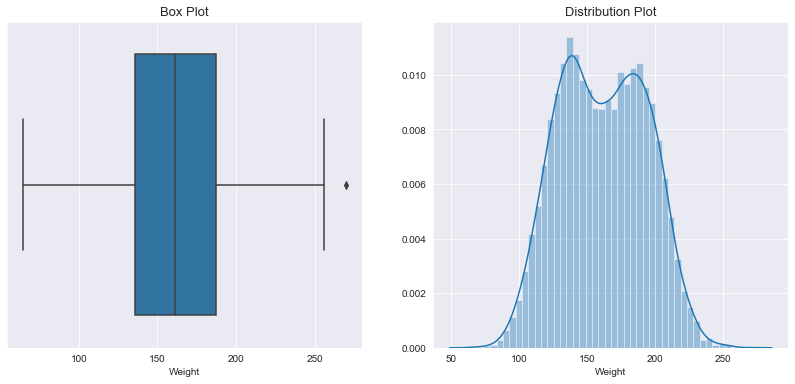

In [29]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(14,6),ncols=2)
ax1 = sns.boxplot(df.Weight, ax = ax[0]);
ax2 = sns.distplot(df.Weight, ax = ax[1]);
ax1.set_title("Box Plot", fontsize = 13)
ax2.set_title('Distribution Plot',  fontsize = 13)

Text(0.5, 1.0, 'Distribution Plot')

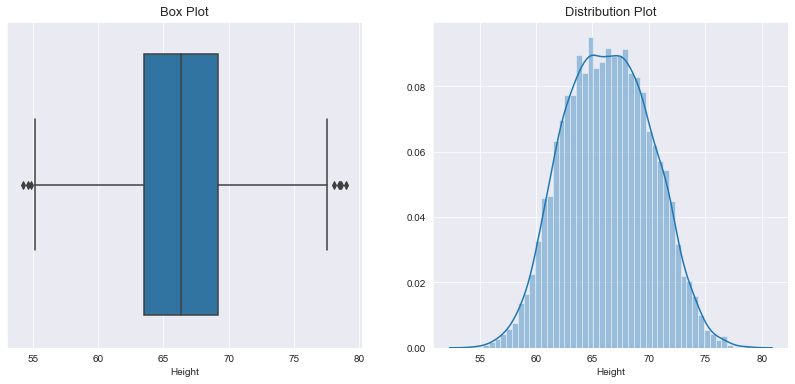

In [30]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(14,6),ncols=2)
ax1 = sns.boxplot(df.Height, ax = ax[0]);
ax2 = sns.distplot(df.Height, ax = ax[1]);
ax1.set_title("Box Plot", fontsize = 13)
ax2.set_title('Distribution Plot',  fontsize = 13)


visualize the relationship between X= Hieght(independent variable) and y= Weight(dependent) variable by plotting a scatterplot between X and y.

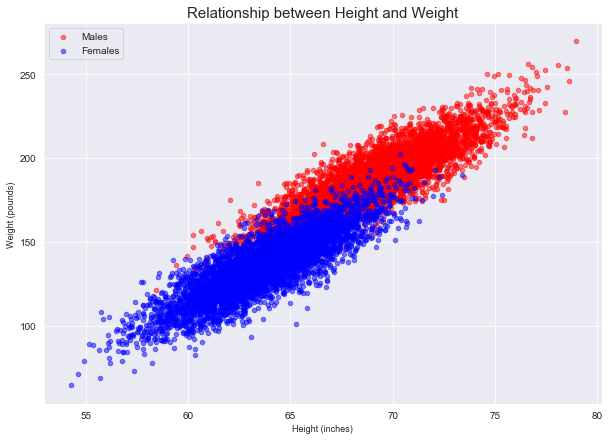

In [31]:
ax1 = df[df['Gender'] == 'Male'].plot(kind='scatter', x='Height', y='Weight', color='red', alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5, figsize=(10 ,7), ax=ax1)
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=15)
plt.xlabel('Height (inches)', size=9)
plt.ylabel('Weight (pounds)', size=9);

In [6]:
# males and females dataframes
df_males = df[df['Gender'] == 'Male']
df_females = df[df['Gender'] == 'Female']

### Scatter plot using regression line

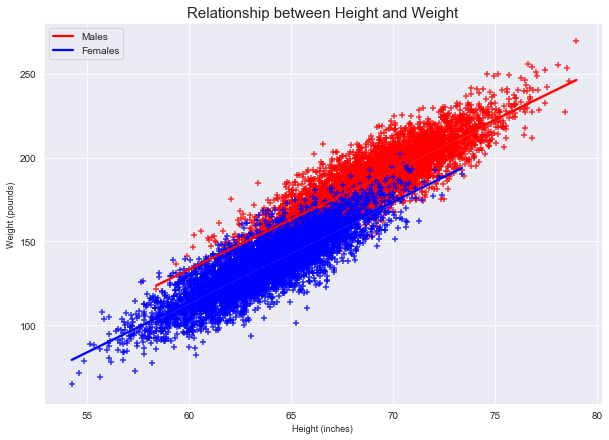

In [34]:

# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=df_males.Height, y=df_males.Weight, color='red', marker='+')
sns.regplot(x=df_females.Height, y=df_females.Weight, color='blue', marker='+')

# Legend, title and labels.
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=15)
plt.xlabel('Height (inches)', size=9)
plt.ylabel('Weight (pounds)', size=9);

In [35]:
corr = df.corr()
corr

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


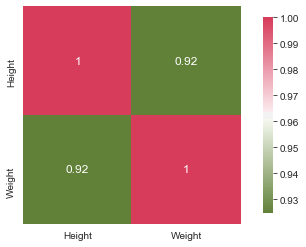

In [36]:
plot_correlation_map( df ) 

It indicates the strong correlation between Height and Weight. 

# Fitting Simple Linear Regression


### LR For Male and Female


In [7]:
# Encoding Gender feature
df['Gender'] = df.Gender.apply(lambda x: 0 if x == "female" else 1)


## X and y


In [8]:
# Rdefine X and y

X = df[['Height', 'Gender']]
y = df['Weight']


In [9]:
# Print the dimensions of X and y after reshaping

print(X.shape)
print(y.shape)


(10000, 2)
(10000,)


## Train test split


split the dataset into two sets namely - train set and test set.

The model learn the relationships from the training data and predict on test data.


In [10]:
# Split X and y into training and test data sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [11]:
# Print the dimensions of X_train,X_test,y_train,y_test

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7000, 2)
(7000,)
(3000, 2)
(3000,)


## Model Training

In this step, the model learned the relationships between the training data (X_train, y_train). 


In [13]:
# Fit the linear model

# Instantiate the linear regression object lm
from sklearn.linear_model import LinearRegression
lm = LinearRegression()


# Train the model using training data sets
# lm.fit(X_train,y_train)


# Predict on the test data
# y_pred=lm.predict(X_test)

##  Cross validation


<img src="Cross-Validation-Diagram.jpg" alt="drawing" width="400"/> 

In [19]:
from sklearn.model_selection import cross_val_score


lm_score =  cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
#lm_score 
lm_score = -1.0*np.mean(lm_score)

rmse1 = np.sqrt(lm_score)
rmse1

12.466826065285671

## Model slope and intercept term

The model slope is given by lm.coef_ and model intercept term is given by lm.intercept_. 

The estimated model slope and intercept values are 1.60509347 and  -11.16003616.

So, the equation of the fitted regression line is

y = 7.6904068 * x - -349.98916461530126  


In [16]:
# # Compute model slope and intercept

# a = lm.coef_
# b = lm.intercept_,
# print("Estimated model slope, a:" , a)
# print("Estimated model intercept, b:" , b) 


In [44]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Height,7.695425


## Making predictions

In [2]:
# Predicting first 5 dats points Weight values from test set

lm.predict(X)[0:5]


## Regression metrics for model performance


Now, it is the time to evaluate model performance. 

For regression problems, there are two ways to compute the model performance. They are RMSE (Root Mean Square Error) and R-Squared Value. These are explained below:-  


### RMSE

In [45]:
# Calculate and print Root Mean Square Error(RMSE)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))


RMSE value: 12.1804


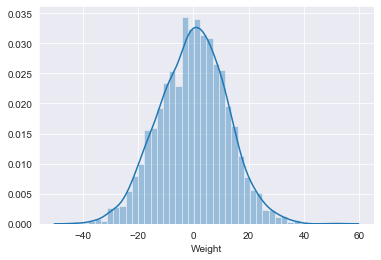

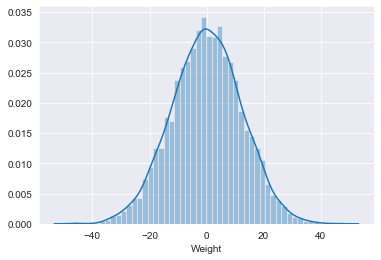

###  R2 Score


R2 Score is another metric to evaluate performance of a regression model. It is also called coefficient of determination. It gives us an idea of goodness of fit for the linear regression models. It indicates the percentage of variance that is explained by the model. 


Mathematically, 


R2 Score = Explained Variation/Total Variation


In general, the higher the R2 Score value, the better the model fits the data. Usually, its value ranges from 0 to 1. So, we want its value to be as close to 1. Its value can become negative if our model is wrong.



In [46]:
# Calculate and print r2_score

from sklearn.metrics import r2_score
print ("R2 Score value: {:.4f}".format(r2_score(y_test, y_pred)))


R2 Score value: 0.8577


## Interpretation and Conclusion


The RMSE value has been found to be 12.1781. It means the standard deviation for our prediction is 12.1781. So, sometimes we expect the predictions to be off by more than 12.1781 and other times we expect less than 12.1781.



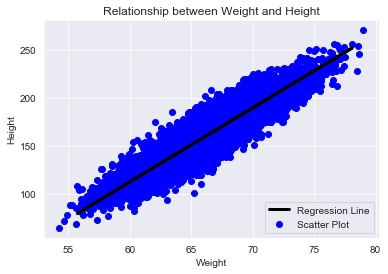

In [47]:
# Plot the Regression Line


plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.plot(X_test, y_pred, color = 'black', linewidth=3, label = 'Regression Line')
plt.title('Relationship between Weight and Height')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend(loc=4)
plt.show()


## Residual analysis



A linear regression model may not represent the data appropriately. The model may be a poor fit to the data. So, we should validate our model by defining and examining residual plots.

The difference between the observed value of the dependent variable (y) and the predicted value (ŷi) is called the residual and is denoted by e. The scatter-plot of these residuals is called residual plot.

If the data points in a residual plot are randomly dispersed around horizontal axis and an approximate zero residual mean, a linear regression model may be appropriate for the data. Otherwise a non-linear model may be more appropriate.

If we take a look at the generated ‘Residual errors’ plot, we can clearly see that the train data plot pattern is random. Same is the case with the test data plot pattern.
So, it suggests a better-fit for a this model. 



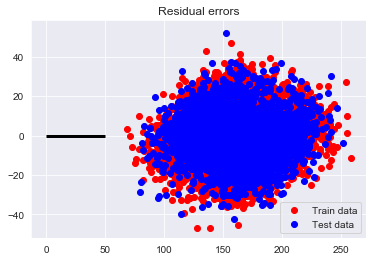

In [48]:
# Plotting residual errors
# Pandas Dataframe.sample()
# plotting training and testing errror 

plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, color = 'red', label = 'Train data')
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, color = 'blue', label = 'Test data')
plt.hlines(xmin = 0, xmax = 50, y = 0, linewidth = 3)
plt.title('Residual errors')
plt.legend(loc = 4)
plt.show()

## Checking for Overfitting and Underfitting(Variance/Bais)


The calculate training set score as 0.8542. Similarly, the calculate test set score as 0.8570. 
The scores are reasonably good. So, the model does learn the relationships appropriately from the training data and perform well on the testing dataset. 



In [49]:
# Checking for Overfitting or Underfitting the data

print("Training set score: {:.4f}".format(lm.score(X_train,y_train)))

print("Test set score: {:.4f}".format(lm.score(X_test,y_test)))

Training set score: 0.8540
Test set score: 0.8577


In [ ]:
# sns.distplot(lm.predict(X_train) - y_train)

In [1]:
# sns.distplot(lm.predict(X_test) - y_test)

## Save result as CSV file

In [ ]:
print('\nPredictions calculated using model:')
predictions = lm.predict(X_test)
predictions

In [ ]:
np.savetxt('predictions.csv', predictions, delimiter=',')

In [82]:
# Save model for future use

from sklearn.externals import joblib
joblib.dump(lm, 'lm_regressor.pkl')

# To load the model

# lm2=joblib.load('lm_regressor.pkl')

['lm_regressor.pkl']